In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from muscleFunctions import *

p = muscle_init()

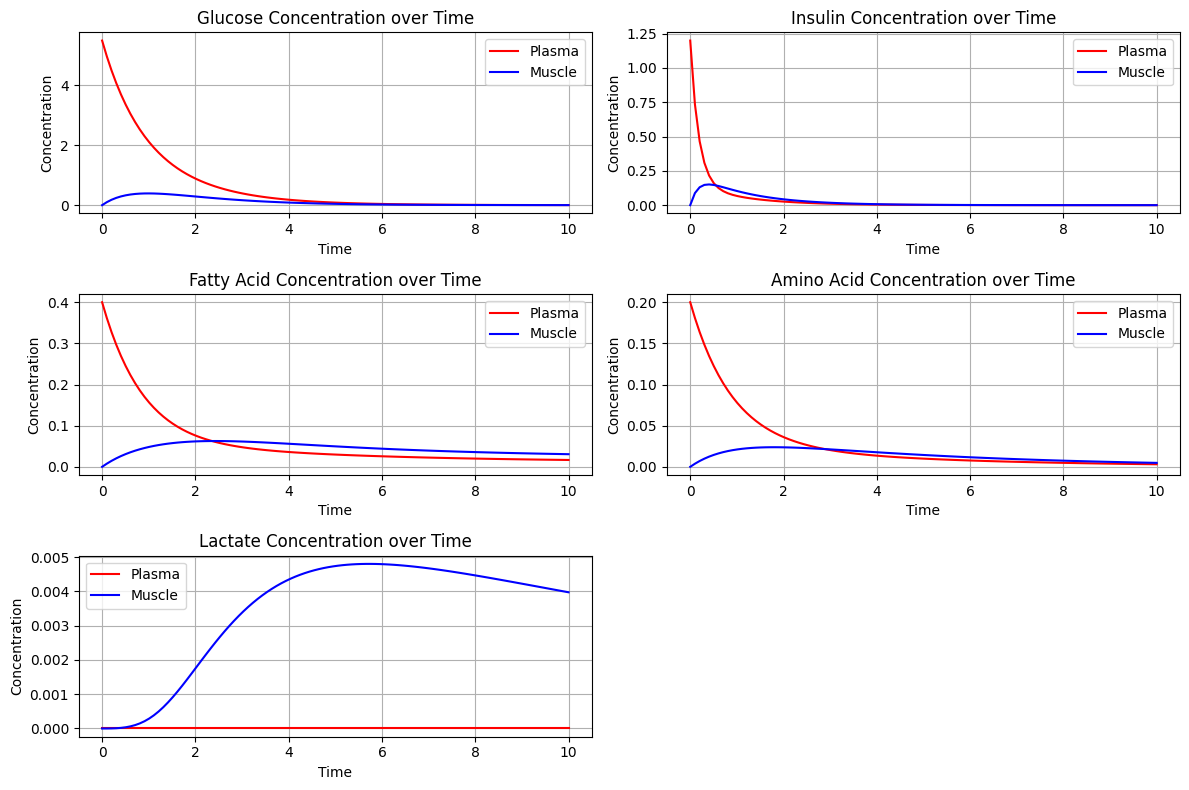

In [2]:

#
# TRY NUMPY.RAND
# check metabolical for ROS generation
# beta oxidation of fatty acids
#
n = 20
y0 = np.zeros(n)
y0[0] = 5.5 #gmmol
y0[2] = 1.2 #g/L
y0[4] = 0.4 #mmol/L
y0[6] = 0.2 #mmol/L

#https://link.springer.com/article/10.1007/s40279-022-01772-2
#average weight of person is around 60 kg,
# skeletal muscle is around 40% of weight
# NAD and NADH concentrations estimated to be around 1.6 mmol/kg and 0.15 mmol/kg muscle weight
#
# volume of skeletal muscle is ~25.0L
y0[12] = 1.6*(60*.4)/25 #mmol/L 
y0[13] = 0.15*(60*.4)/25 #mmol/L

#no certain data for FAD and FADH2, but assume its around 1/3 of NAD
y0[14] = 1.6*(60*.4)/25/3
y0[15] = 0.15*(60*.4)/25/3

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)


solution = solve_ivp(fun=lambda t, y: skeletalmuscle(t, y, p, n),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')

timespan = solution.t   
glucoseplasma = solution.y[0]
glucosemuscle = solution.y[1]
glycogen = solution.y[9]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(timespan, glucoseplasma, label='Plasma', color='red')
plt.plot(timespan, glucosemuscle, label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Glucose Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(timespan, solution.y[2], label='Plasma', color='red')
plt.plot(timespan, solution.y[3], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Insulin Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(timespan, solution.y[4], label='Plasma', color='red')
plt.plot(timespan, solution.y[5], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fatty Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(timespan, solution.y[6], label='Plasma', color='red')
plt.plot(timespan, solution.y[7], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amino Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(timespan, solution.y[18], label='Plasma', color='red')
plt.plot(timespan, solution.y[19], label='Muscle', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Lactate Concentration over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

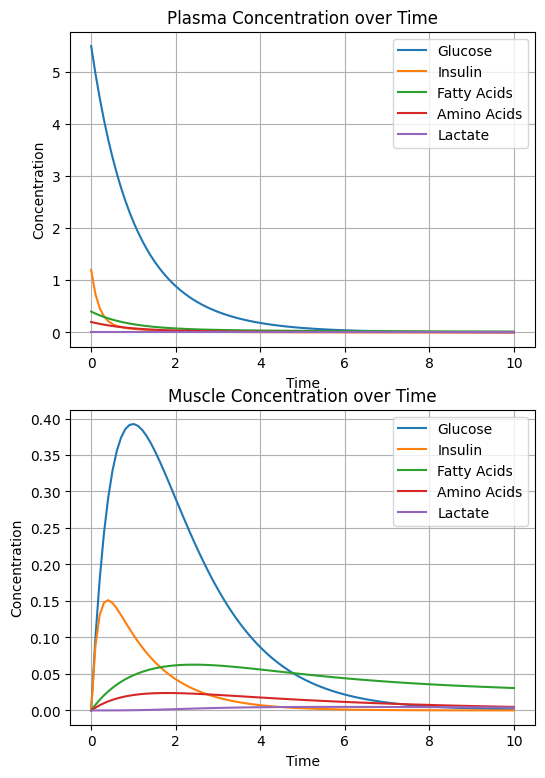

In [3]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[0], label='Glucose')
plt.plot(timespan, solution.y[2], label='Insulin')
plt.plot(timespan, solution.y[4], label='Fatty Acids')
plt.plot(timespan, solution.y[6], label='Amino Acids')
plt.plot(timespan, solution.y[18], label='Lactate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Plasma Concentration over Time')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[1], label='Glucose')
plt.plot(timespan, solution.y[3], label='Insulin')
plt.plot(timespan, solution.y[5], label='Fatty Acids')
plt.plot(timespan, solution.y[7], label='Amino Acids')
plt.plot(timespan, solution.y[19], label='Lactate')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

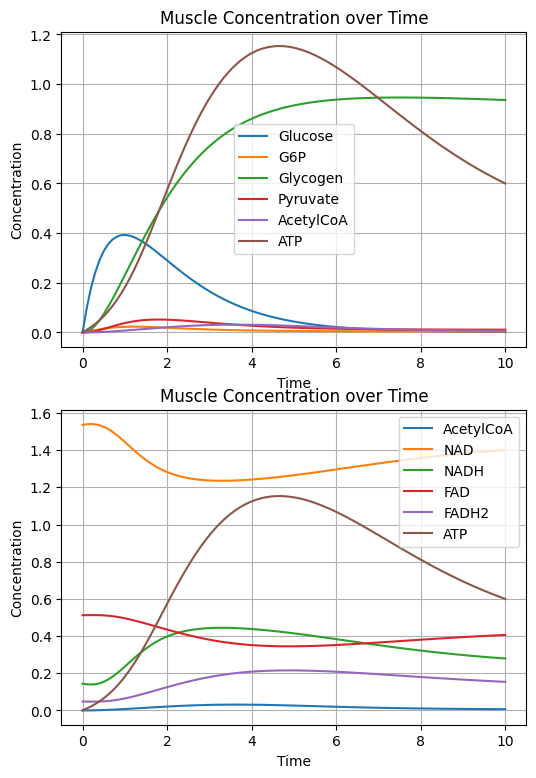

In [4]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[1], label='Glucose')
plt.plot(timespan, solution.y[8], label='G6P')
plt.plot(timespan, solution.y[9], label='Glycogen')
plt.plot(timespan, solution.y[10], label='Pyruvate')
plt.plot(timespan, solution.y[11], label='AcetylCoA')
plt.plot(timespan, solution.y[17], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[11], label='AcetylCoA')
plt.plot(timespan, solution.y[12], label='NAD')
plt.plot(timespan, solution.y[13], label='NADH')
plt.plot(timespan, solution.y[14], label='FAD')
plt.plot(timespan, solution.y[15], label='FADH2')
plt.plot(timespan, solution.y[17], label='ATP')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

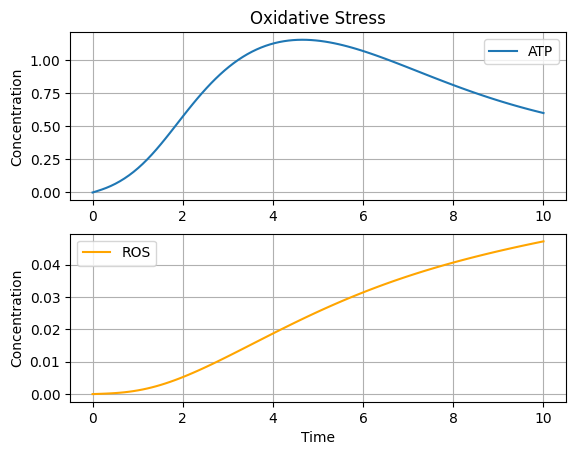

In [5]:
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[17], label='ATP')


plt.ylabel('Concentration')
plt.title('Oxidative Stress')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)

plt.plot(timespan, solution.y[16], label='ROS', color='orange')
plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.grid(True)